# Turntable Control Data Analyzer
Parses and plots the data from the turntable in order to fine tune its PID parameters

## Usage

* Set `dataUrl` to a link which points to the raw txt file you want to process. 
* Set `outputText`, `plotTarget`, `plotValue`, `plotDistanceToTarget`, and `plotAppliedVoltage` to customize the output style

Run the parser by clicking in the cell with code, and pressing the "run" button (located in the row of icons, it looks like a play/pause symbol).


[TURNTABLE] 806 0 0 127
[TURNTABLE] 806 0 0 127
[TURNTABLE] 806 0 0 127
[TURNTABLE] 806 0 0 127
[TURNTABLE] 806 2 200 127
[TURNTABLE] 806 2 0 127
[TURNTABLE] 806 9 700 127
[TURNTABLE] 806 14 500 127
[TURNTABLE] 806 17 300 127
[TURNTABLE] 806 23 600 127
[TURNTABLE] 806 25 200 127
[TURNTABLE] 806 31 600 127
[TURNTABLE] 806 38 700 127
[TURNTABLE] 806 41 300 127
[TURNTABLE] 806 49 800 127
[TURNTABLE] 806 54 500 127
[TURNTABLE] 806 61 700 127
[TURNTABLE] 806 70 900 127
[TURNTABLE] 806 76 600 127
[TURNTABLE] 806 85 900 127
[TURNTABLE] 806 90 500 127
[TURNTABLE] 806 97 700 127
[TURNTABLE] 806 108 1100 127
[TURNTABLE] 806 113 500 127
[TURNTABLE] 806 121 800 127
[TURNTABLE] 806 131 1000 127
[TURNTABLE] 806 136 500 127
[TURNTABLE] 806 146 1000 127
[TURNTABLE] 806 150 400 127
[TURNTABLE] 806 157 700 127
[TURNTABLE] 806 166 900 127
[TURNTABLE] 806 173 700 127
[TURNTABLE] 806 182 900 127
[TURNTABLE] 806 189 700 127
[TURNTABLE] 806 194 500 127
[TURNTABLE] 806 204 1000 127
[TURNTABLE] 806 212 800 127

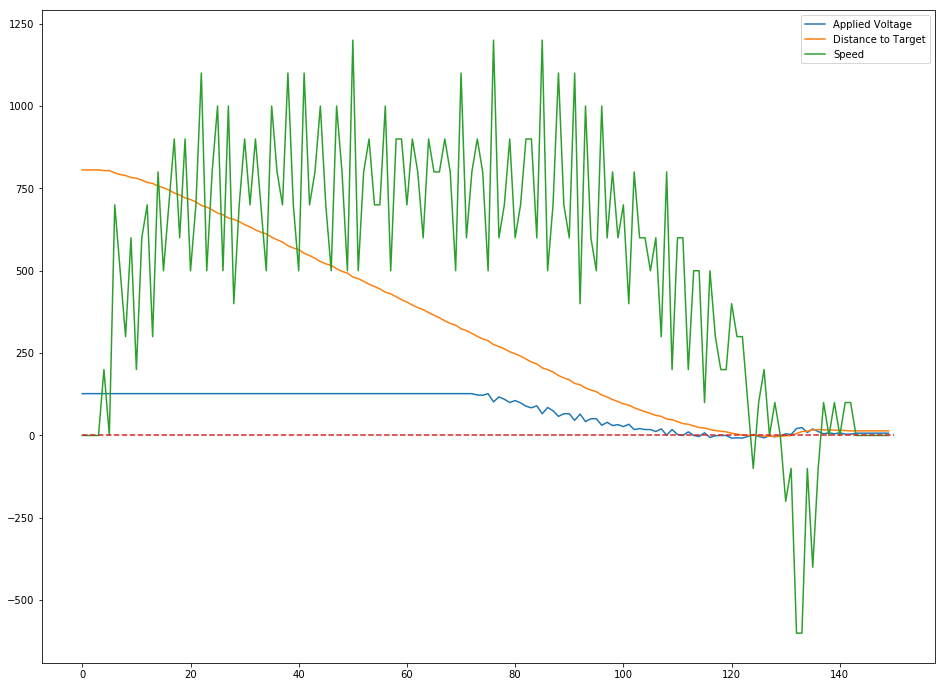

In [9]:
%matplotlib inline   
import urllib.request
import numpy as np
import matplotlib.pyplot as plt

dataUrl = "https://raw.githubusercontent.com/PARobotics/Analysis-Data/master/2017-2018/September/29/3.txt"
outputText = True

plotTarget = 0
plotValue = 0
plotDistanceToTarget = 1
plotAppliedVoltage = 1
plotSpeed = 1

lines = []

with urllib.request.urlopen(dataUrl) as url:
    s = url.read().decode("utf8").split("\n")   
    
for line in s:
    while "  " in line:
        line = line.replace("  ", " ")
    if "[TURNTABLE] " in line and len(line.split(" ")) == 5:
        if outputText: print(line)
        line = line.replace("[TURNTABLE] ", "")
        lines.append(line)
        
plt.figure(figsize = (16,12))
    
target = []
value = []
appliedVoltage = []
distanceToTarget = []
speed = []
    
for line in lines:
    line = line.replace("\r", "").split(" ")
    if plotTarget and len(line[0]) <= 5 and len(line[0]) > 0: target.append(int(line[0]))
    if plotValue and len(line[1]) <= 5 and len(line[1]) > 0: value.append(int(line[1]))
    if plotSpeed and len(line[2]) <= 5 and len(line[2]) > 0: speed.append(int(line[2]))
    if plotAppliedVoltage and len(line[3]) <= 3 and len(line[3]) > 0: appliedVoltage.append(int(line[3]))
    if plotDistanceToTarget and len(line[1]) <= 5 and len(line[0]) <= 5 and len(line[0]) > 0 and len(line[1]) > 0: distanceToTarget.append(int(line[0]) - int(line[1]))
    
if plotTarget: plt.plot(target, label = "Target Value")
if plotValue: plt.plot(value, label = "Actual Value")
if plotAppliedVoltage: plt.plot(appliedVoltage, label = "Applied Voltage")
if plotDistanceToTarget: plt.plot(distanceToTarget, label = "Distance to Target")
if plotSpeed: plt.plot(speed, label = "Speed")
    
plt.plot([0, len(lines)], [0, 0], "--")
    
plt.legend()
plt.show()
